In [20]:
#%pip install ipywidgets
#%pip install pandas-profiling
#%pip install sweetviz
#%pip install autoviz
#%pip install dtale
#%pip install umap-learn

In [21]:
import pandas as pd
import umap.umap_ as umap
#import sweetviz #usado mais pra dados rotulados
import dtale
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [22]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [23]:
rootPath = "C:\\Users\\mlb\\Teste_VOCs\\DataFiles"
columnsName = ["0","1","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade"]
columnsName2 = ["index","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperatura","pressao","umidade","culture_day","c_type"]

In [24]:
#data dictionary
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6

df_glabrata_24h = pd.read_csv(rootPath+"\\glabrata_24hs_leitura1.csv", delim_whitespace=True, header=None, names=columnsName)
df_glabrata_24h =  df_glabrata_24h.drop(["0","1"], axis=1)
df_glabrata_24h.dropna(inplace=True)
df_glabrata_24h.reset_index(drop=True, inplace=True)
df_glabrata_24h['c_type'] = 2
df_glabrata_24h['culture_day'] = 1

df_glabrata_48h = pd.read_csv(rootPath+"\\glabrata_48hs_leitura1.csv", delim_whitespace=True, header=None, names=columnsName)
df_glabrata_48h = df_glabrata_48h.drop(["0","1"], axis=1)
df_glabrata_48h.dropna(inplace=True)
df_glabrata_48h.reset_index(drop=True, inplace=True)
df_glabrata_48h['c_type'] = 2
df_glabrata_48h['culture_day'] = 2

In [25]:
df_glabrata_24h.head()

,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,1.623770e+09,87010.0,7305.0,6026.0,55600.0,3654.0,28750.0,7976.0,64.62,100.07,9.43,2,1
1,1.623770e+09,86950.0,7305.0,6026.0,55660.0,3656.0,28760.0,7978.0,64.64,100.07,9.39,2,1
2,1.623770e+09,86950.0,7305.0,6026.0,55660.0,3658.0,28750.0,7978.0,64.64,100.07,9.36,2,1
3,1.623770e+09,87130.0,7305.0,6026.0,55660.0,3664.0,28760.0,7972.0,64.64,100.03,9.47,2,1
4,1.623770e+09,87070.0,7305.0,6026.0,55600.0,3662.0,28790.0,7978.0,64.64,100.07,9.29,2,1


In [26]:
len(df_glabrata_24h)

6490

In [27]:
df_glabrata_48h.head()

,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,1.623872e+09,85080.0,7024.0,11030.0,36150.0,2261.0,15360.0,7797.0,62.56,100.03,8.60,2,2
1,1.623872e+09,85080.0,7024.0,10100.0,36030.0,2258.0,15350.0,7805.0,62.55,100.03,8.54,2,2
2,1.623872e+09,85020.0,7024.0,9726.0,36060.0,2258.0,15360.0,7805.0,62.56,99.99,8.43,2,2
3,1.623872e+09,85080.0,7017.0,9357.0,36030.0,2259.0,15370.0,7806.0,62.56,99.99,8.53,2,2
4,1.623872e+09,85080.0,7024.0,8996.0,36120.0,2259.0,15380.0,7806.0,62.56,99.91,8.60,2,2


In [28]:
len(df_glabrata_48h)

6482

In [29]:
#Join the albicans dataframes
frames  = [df_glabrata_24h,df_glabrata_48h]
df_glabrata_joined = pd.concat(frames)
df_glabrata_joined.reset_index(inplace=True)
df_glabrata_joined

,index,timestamp,TGS826,TGS2611,TGS2603,TGS813,TGS822,TGS2602,TGS823,temperatura,pressao,umidade,c_type,culture_day
0,0,1.623770e+09,87010.0,7305.0,6026.0,55600.0,3654.0,28750.0,7976.0,64.62,100.07,9.43,2,1
1,1,1.623770e+09,86950.0,7305.0,6026.0,55660.0,3656.0,28760.0,7978.0,64.64,100.07,9.39,2,1
2,2,1.623770e+09,86950.0,7305.0,6026.0,55660.0,3658.0,28750.0,7978.0,64.64,100.07,9.36,2,1
3,3,1.623770e+09,87130.0,7305.0,6026.0,55660.0,3664.0,28760.0,7972.0,64.64,100.03,9.47,2,1
4,4,1.623770e+09,87070.0,7305.0,6026.0,55600.0,3662.0,28790.0,7978.0,64.64,100.07,9.29,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12967,6477,1.623879e+09,34810.0,28700.0,27010.0,17080.0,468.4,1593.0,4497.0,59.23,55.64,6.11,2,2
12968,6478,1.623879e+09,34760.0,28700.0,27030.0,17070.0,465.9,1590.0,4496.0,59.23,55.52,6.17,2,2
12969,6479,1.623879e+09,34860.0,28700.0,27020.0,17150.0,465.9,1595.0,4504.0,59.23,55.72,6.10,2,2
12970,6480,1.623879e+09,34850.0,28680.0,27030.0,17210.0,468.4,1597.0,4508.0,59.23,55.80,6.04,2,2


In [30]:
d = dtale.show(df_glabrata_joined.drop([3463]))
d.open_browser()

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 2070, in wsgi_app
    response = self.full_dispatch_request()
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1515, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1513, in full_dispatch_request
    rv = self.dispatch_request()
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1499, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\dash\dash.

2021-07-04 15:23:24,752 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 2070, in wsgi_app
    response = self.full_dispatch_request()
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1515, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1513, in full_dispatch_request
    rv = self.dispatch_request()
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1499, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Te

Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 2070, in wsgi_app
    response = self.full_dispatch_request()
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1515, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1513, in full_dispatch_request
    rv = self.dispatch_request()
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1499, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\dash\dash.

2021-07-04 15:34:12,802 - ERROR    - Exception on /dtale/charts/_dash-update-component [POST]
Traceback (most recent call last):
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 2070, in wsgi_app
    response = self.full_dispatch_request()
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1515, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1513, in full_dispatch_request
    rv = self.dispatch_request()
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\flask\app.py", line 1499, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Te

In [24]:
d = dtale.show(df_glabrata_joined.drop(columns=['c_type','index']))
d.open_browser()

In [15]:
df_glabrata_joined.to_csv(r'DatasetsJoined\AllGlabrataCollect.csv', index = False)
df_glabrata_24h.to_csv(r'NewDatasets\NewGlabrata_24h.csv', index = False)
df_glabrata_48h.to_csv(r'NewDatasets\NewGlabrata_48h.csv', index = False)

In [16]:
glabrata_data = df_glabrata_joined.drop(columns=['c_type'])
scaled_glabrata_df = StandardScaler().fit_transform(glabrata_data)
scaled_glabrata_df

array([[-1.73178247, -1.06178497,  0.06649593, ...,  1.00056205,
         0.34152172, -0.99938348],
       [-1.73124838, -1.06177557,  0.06642578, ...,  1.00056205,
         0.32464461, -0.99938348],
       [-1.73071429, -1.06176321,  0.06642578, ...,  1.00056205,
         0.31198678, -0.99938348],
       ...,
       [ 1.72857662,  1.06267563,  0.00552706, ..., -1.10300577,
        -1.06349753,  1.0006169 ],
       [ 1.72911071,  1.06268779,  0.00551537, ..., -1.09921129,
        -1.08881319,  1.0006169 ],
       [ 1.7296448 ,  1.06270027,  0.00555044, ..., -1.12150389,
        -1.08037464,  1.0006169 ]])

In [17]:
reducer = umap.UMAP()

In [18]:
#Usa os dados reescalonados para a redução de dimensionalidade
embedding = reducer.fit_transform(scaled_glabrata_df)
embedding.shape

D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning:

invalid value encountered in true_divide

D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning:

invalid value encountered in true_divide

D:\Pessoais\Doutorado\2_Semestre\Ambiente_de_desenvolvimento\envs\Teste_VOCS\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



(12972, 2)

Text(0.5, 1.0, 'UMAP projection of the C. Glabrata dataset')

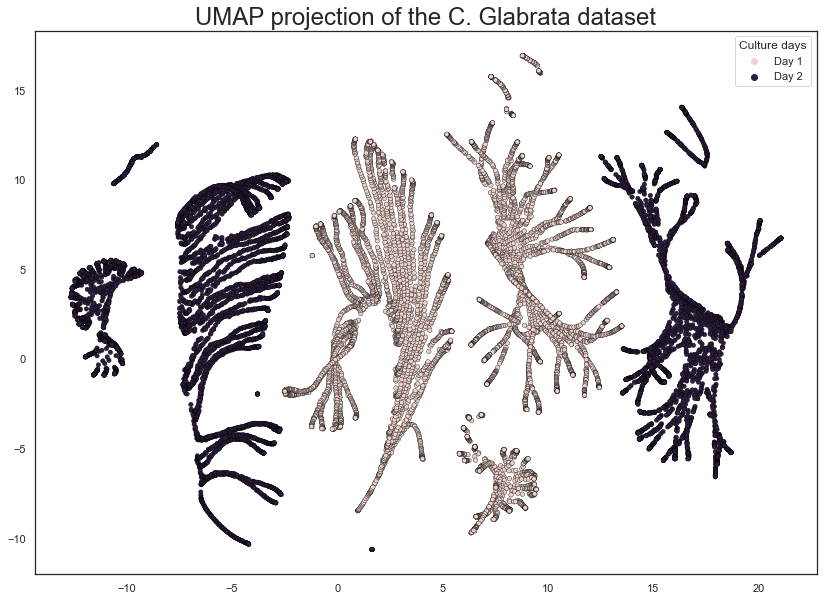

In [19]:
ax = sns.scatterplot(data=embedding, x=embedding[:, 0], y=embedding[:, 1], cmap="RdYlGn_r", s=20, ec='black',  hue=df_glabrata_joined.culture_day)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ["Day 1", "Day 2"], loc='upper right', title="Culture days")
plt.title('UMAP projection of the C. Glabrata dataset', fontsize=24)

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_glabrata_df)
result = pd.DataFrame(data = principalComponents
             , columns = ['PCA0', 'PCA1','PCA2'])

Text(0.5, 0.92, 'PCA projection of the C. Glabrata dataset')

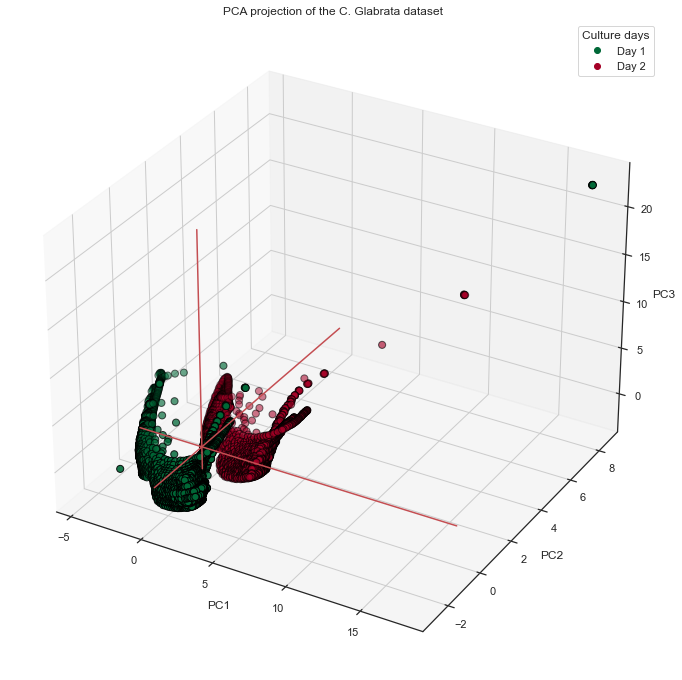

In [21]:
fig = plt.figure(figsize=[15,12])

ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=df_glabrata_joined.culture_day, cmap="RdYlGn_r", s=50, ec='black')
handles, labels = scatter.legend_elements()
legend2 = ax.legend(handles, ["Day 1","Day 2"], loc="upper right", title="Culture days")

# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA projection of the C. Glabrata dataset")

In [22]:
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(scaled_glabrata_df)
result2 = pd.DataFrame(data = principalComponents2
             , columns = ['PCA0', 'PCA1'])

Text(0.5, 1.0, 'PCA projection of the C. Glabrata dataset')

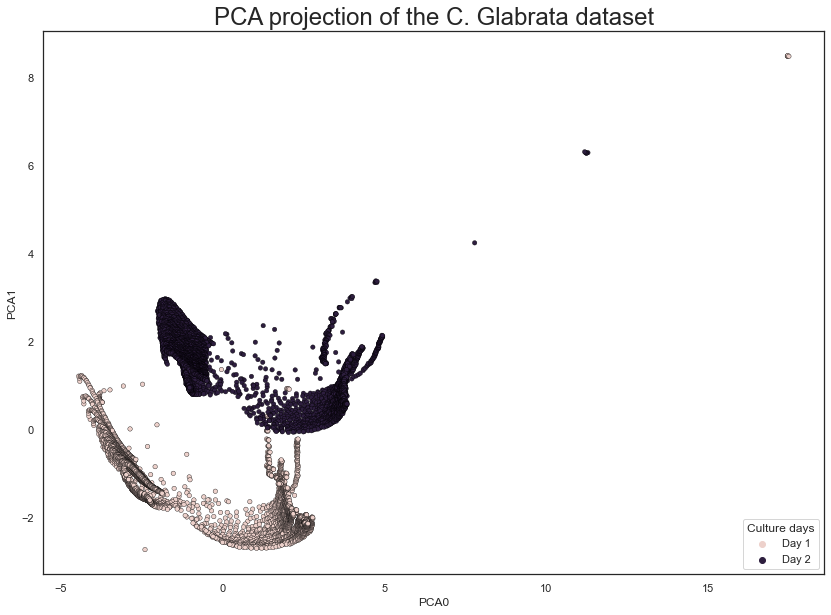

In [23]:
ax = sns.scatterplot(data=result2, x=result2['PCA0'], y=result2['PCA1'],cmap="RdYlGn_r", s=20, ec='black',  hue=df_glabrata_joined.culture_day)
handles, labels  =  ax.get_legend_handles_labels()
plt.legend(handles, ["Day 1", "Day 2"], loc='lower right', title="Culture days")
plt.title('PCA projection of the C. Glabrata dataset', fontsize=24)